In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [28]:
# Step 1: Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [29]:
# Step 2: Preprocess the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [30]:
# Convert class vectors to binary class matrices (one-hot encoding)
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [31]:
# Step 3: Define a more complex CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Adding dropout for regularization
    Dense(num_classes, activation='softmax')
])

In [32]:
# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001),  # Lowering the learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
# Step 4: Train the model for more epochs
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
782/782 [==============================] - 11s 9ms/step - loss: 1.8452 - accuracy: 0.3295 - val_loss: 1.5137 - val_accuracy: 0.4670
Epoch 2/30
782/782 [==============================] - 6s 8ms/step - loss: 1.5392 - accuracy: 0.4440 - val_loss: 1.3644 - val_accuracy: 0.5153
Epoch 3/30
782/782 [==============================] - 6s 7ms/step - loss: 1.4159 - accuracy: 0.4923 - val_loss: 1.2630 - val_accuracy: 0.5544
Epoch 4/30
782/782 [==============================] - 7s 9ms/step - loss: 1.3345 - accuracy: 0.5262 - val_loss: 1.2094 - val_accuracy: 0.5772
Epoch 5/30
782/782 [==============================] - 6s 8ms/step - loss: 1.2620 - accuracy: 0.5537 - val_loss: 1.1557 - val_accuracy: 0.5906
Epoch 6/30
782/782 [==============================] - 7s 9ms/step - loss: 1.2033 - accuracy: 0.5759 - val_loss: 1.0759 - val_accuracy: 0.6216
Epoch 7/30
782/782 [==============================] - 6s 7ms/step - loss: 1.1505 - accuracy: 0.5980 - val_loss: 1.0535 - val_accuracy: 0.6284
Epoch

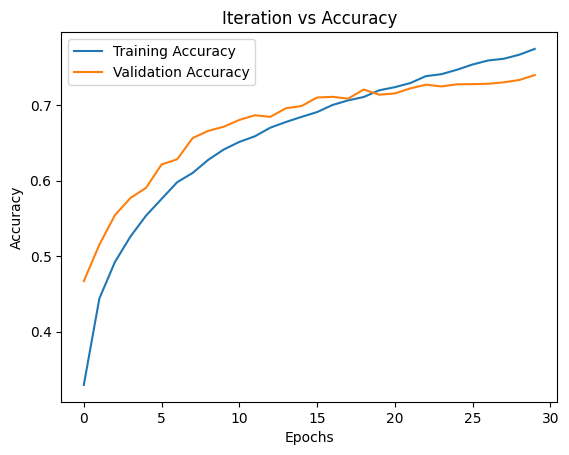

In [34]:
# Plot iteration vs accuracy and loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Iteration vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

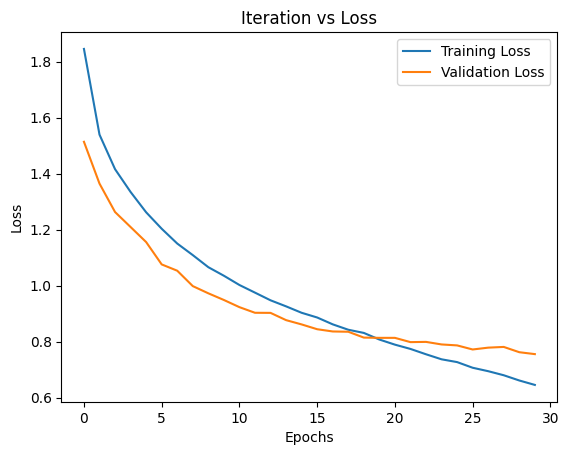

In [35]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Iteration vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
# Step 5: Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.7557 - accuracy: 0.7400
Test accuracy: 0.7400000095367432


In [37]:
# Check if test accuracy is more than 70%
if test_acc > 0.70:
    print("Congratulations! Model achieved more than 70% accuracy.")
else:
    print("Model failed to achieve 70% accuracy.")


Congratulations! Model achieved more than 70% accuracy.
